In [1]:
# Import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc 
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob
from lab_coffee_utils import plt_layer, plt_output_unit, plt_network

In [2]:
# Load the data
X, Y = load_coffee_data()
print(X.shape, Y.shape)

pd.DataFrame(X, index=Y[:, 0], columns=['Temperature', 'Minutes'])

(200, 2) (200, 1)


,Temperature,Minutes
1.0,185.317638,12.693965
0.0,259.920475,11.867664
0.0,231.013571,14.414242
0.0,175.366645,11.720587
1.0,187.120865,14.129732
...,...,...
0.0,223.781833,15.299167
0.0,266.627673,12.480510
0.0,273.683982,13.097562
1.0,220.610006,12.799891


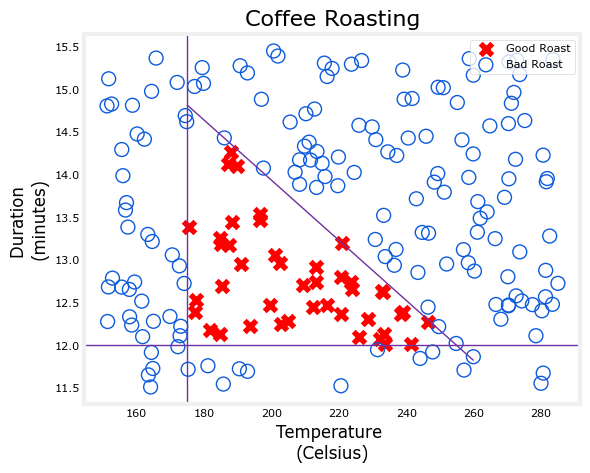

In [3]:
plt_roast(X, Y)

In [3]:
print(f"Temperature. Max: {np.max(X[:, 0])}, Min: {np.min(X[:, 0])}")
print(f"Duration. Max: {np.max(X[:, 1])}, Min: {np.min(X[:, 1])}")
print("=============")
# Normalization using Z-score
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)
print(f"Temperature. Max: {np.max(Xn[:, 0])}, Min: {np.min(Xn[:, 0])}")
print(f"Duration. Max: {np.max(Xn[:, 1])}, Min: {np.min(Xn[:, 1])}")

pd.DataFrame(Xn)

Temperature. Max: 284.99434167453603, Min: 151.32372212128612
Duration. Max: 15.454206928801511, Min: 11.512747082472469
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Temperature. Max: 1.659753680229187, Min: -1.6852186918258667
Duration. Max: 1.793238878250122, Min: -1.6996712684631348


2023-05-25 00:06:53.494120: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


,0,1
0,-0.834555,-0.652879
1,1.032305,-1.385145
2,0.308939,0.871625
3,-1.083569,-1.515484
4,-0.789431,0.619493
...,...,...
195,0.127972,1.655843
196,1.200146,-0.842043
197,1.376723,-0.295213
198,0.048600,-0.559008


In [31]:
test = np.random.rand(3, 4, 4)

print(test)

[[[0.52 0.99 0.57 0.46]
  [0.63 0.77 0.01 0.84]
  [0.46 0.01 0.26 0.54]
  [0.55 0.71 0.66 0.34]]

 [[0.21 0.52 0.68 0.39]
  [0.26 0.66 0.31 0.77]
  [0.22 0.16 0.69 0.51]
  [0.6  0.38 0.25 0.14]]

 [[0.58 0.86 0.67 0.93]
  [0.85 0.35 0.69 0.1 ]
  [0.66 0.97 0.88 0.8 ]
  [0.91 0.1  0.84 0.39]]]


In [33]:
norm_l.adapt(test)
norm_l(test)

ValueError: in user code:

    File "/Users/lehoanganh/miniforge3/envs/mlp/lib/python3.10/site-packages/keras/engine/base_preprocessing_layer.py", line 123, in adapt_step  *
        self.update_state(data)
    File "/Users/lehoanganh/miniforge3/envs/mlp/lib/python3.10/site-packages/keras/layers/preprocessing/normalization.py", line 318, in update_state  **
        self.adapt_mean * existing_weight + batch_mean * batch_weight

    ValueError: Dimensions must be equal, but are 2 and 4 for '{{node add_1}} = AddV2[T=DT_FLOAT](mul, mul_1)' with input shapes: [2], [4,4].


In [5]:
# Increase the size of data (equivalent to ConstantArray in Mathematica)
Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [6]:
# Create the NN with 2 layers
tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input(shape=(2,)), # Input layer
    Dense(3, activation='sigmoid', name='layer1'),
    Dense(1, activation='sigmoid', name='layer2')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Return the weights and biases of each layer
print(model.get_layer("layer1").get_weights())

print(model.get_layer("layer2").get_weights())

[array([[ 0.19, -0.56,  0.32],
       [ 0.64,  0.1 , -0.64]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[-1.13],
       [ 0.54],
       [-0.62]], dtype=float32), array([0.], dtype=float32)]


In [8]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(Xt, Yt, epochs=9)

Epoch 1/9
6250/6250 [==============================] - 28s 4ms/step - loss: 0.1696
Epoch 2/9
2872/6250 [============>.................] - ETA: 14s - loss: 0.0533

In [ ]:
# Return the weights and biases of each layer
print(model.get_layer("layer1").get_weights())

print(model.get_layer("layer2").get_weights())

W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

[array([[  0.15,  14.16, -10.58],
       [ 10.04,  11.77,  -0.3 ]], dtype=float32), array([ 12.11,   1.75, -11.47], dtype=float32)]
[array([[ 40.11],
       [-43.77],
       [-49.53]], dtype=float32), array([-12.62], dtype=float32)]
W1:
 [[  0.15  14.16 -10.58]
 [ 10.04  11.77  -0.3 ]] 
b1: [ 12.11   1.75 -11.47]
W2:
 [[ 40.11]
 [-43.77]
 [-49.53]] 
b2: [-12.62]


In [ ]:
# Try using predict
X_test = np.array([[200, 12],
                   [200, 20]])
X_testn = norm_l(X_test)
print(X_testn)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

tf.Tensor(
[[-0.47 -1.27]
 [-0.47  5.82]], shape=(2, 2), dtype=float32)
1/1 [==============================] - 0s 13ms/step
predictions = 
 [[6.45e-01]
 [8.33e-08]]


In [ ]:
yhat = (predictions >= 0.5).astype(int)
print(f"Decision = {yhat}")

Decision = [[1]
 [0]]


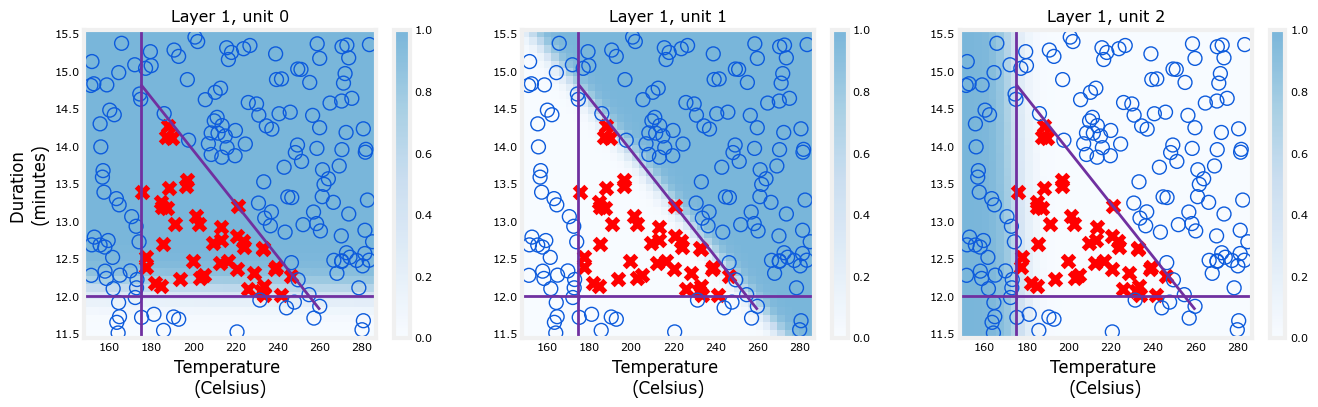

In [ ]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

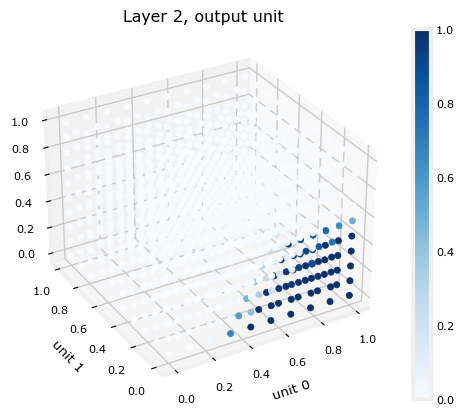

In [ ]:
plt_output_unit(W2,b2)

7/7 [==============================] - 0s 7ms/step


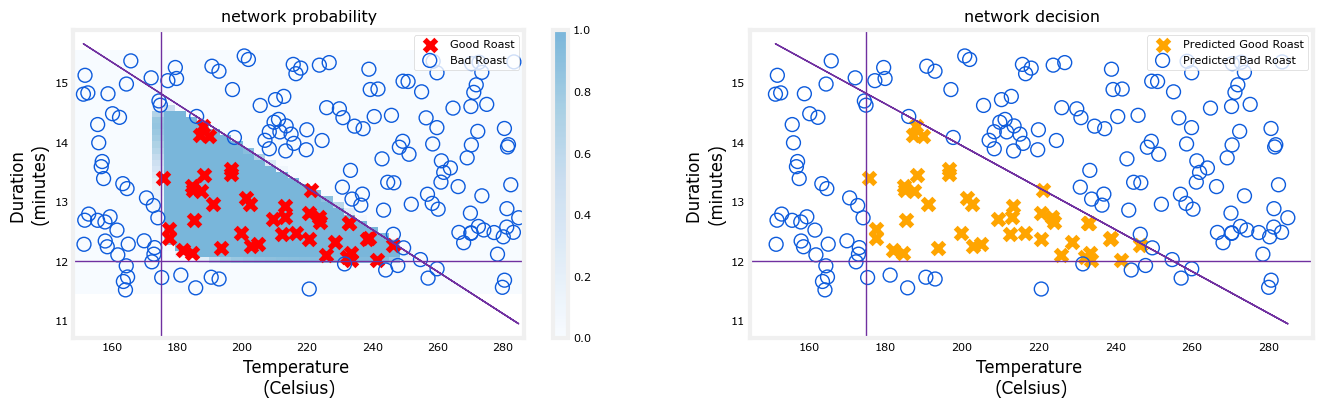

In [ ]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)